# Text Analysis of IMDB Movie Reviews using NLTK
This project shows the 15 most common nouns and adjectives found in the IMDB reviews for the movie 'The Fault In Our Stars', and provides a sentiment analysis as well. 

- MIS3640 Spring 2021 
- Homework 2 
- March 17, 2021

- Submitted by: Abegail Santos

## Getting the details of the movie: title and reviews in IMDB

In [73]:
import imdbpie
import pprint
imdb = imdbpie.Imdb()

In [74]:
movie_id = 'tt2582846' #IMDB ID of The Fault in Our Stars

In [75]:
def get_movie_title(movie_id):
    title = imdb.get_title(movie_id)['base']['title']
    return title

get_movie_title(movie_id)

'The Fault in Our Stars'

In [76]:
reviews_list = []
def get_movie_reviews(movie_id):
    reviews = imdb.get_title_user_reviews(movie_id)
    for review in reviews['reviews']:
        reviews_list.append(review['reviewText']) #get all review text in the IMBD review section
    pprint.pprint(reviews_list)
    return reviews_list 

get_movie_reviews('tt2582846')
reviews_list

['One of the best romance movies I have ever seen and one of my favorite '
 'movies that I have ever seen. I loved the book and I loved the movie even '
 'more. The writing, plot, story, and screenplay were fantastic. Shaileen '
 "Woodley and Ansel Elgort's performances in the film as Hazel and Augustus "
 'were spectacular. The Fault in Our Stars is gorgeous, funny and sad at the '
 'same time and it shows true love can be found no matter what. Loved it so '
 'much.',
 'I went into this movie not having read the book and not knowing anything '
 'more than the overall plot. I am a sucker for a good love story, especially '
 'love that I can relate to. The pain and emotions felt by the characters felt '
 'so real, as if I was feeling the same emotions.\n'
 '\n'
 'Though this was THE SADDEST movie I have ever seen, it was also one of the '
 'most beautiful, as it truly showed how exhilarating and comforting and '
 'exciting love is. \n'
 '\n'
 'I probably cried throughout about half of t

["One of the best romance movies I have ever seen and one of my favorite movies that I have ever seen. I loved the book and I loved the movie even more. The writing, plot, story, and screenplay were fantastic. Shaileen Woodley and Ansel Elgort's performances in the film as Hazel and Augustus were spectacular. The Fault in Our Stars is gorgeous, funny and sad at the same time and it shows true love can be found no matter what. Loved it so much.",
 'I went into this movie not having read the book and not knowing anything more than the overall plot. I am a sucker for a good love story, especially love that I can relate to. The pain and emotions felt by the characters felt so real, as if I was feeling the same emotions.\n\nThough this was THE SADDEST movie I have ever seen, it was also one of the most beautiful, as it truly showed how exhilarating and comforting and exciting love is. \n\nI probably cried throughout about half of the movie, along with the rest of the audience. I cried to th

## Data preparation
### Tokenization
Tokenization in NLP is the process by which a large quantity of text is divided into smaller parts called tokens

In [77]:
tokenized_sents = []
def tokenize_sentence(review_list):
    """
    This function performs tokenization for the reviews. 
    """
    from nltk import sent_tokenize
    
    for sentence in review_list:
        tokenized_sentences = sent_tokenize(sentence) #divide the reviews into separate paragraphs
        tokenized_sents.append(tokenized_sentences)
    return tokenized_sents

tokenize_sentence(reviews_list)
tokenized_sents

[['One of the best romance movies I have ever seen and one of my favorite movies that I have ever seen.',
  'I loved the book and I loved the movie even more.',
  'The writing, plot, story, and screenplay were fantastic.',
  "Shaileen Woodley and Ansel Elgort's performances in the film as Hazel and Augustus were spectacular.",
  'The Fault in Our Stars is gorgeous, funny and sad at the same time and it shows true love can be found no matter what.',
  'Loved it so much.'],
 ['I went into this movie not having read the book and not knowing anything more than the overall plot.',
  'I am a sucker for a good love story, especially love that I can relate to.',
  'The pain and emotions felt by the characters felt so real, as if I was feeling the same emotions.',
  'Though this was THE SADDEST movie I have ever seen, it was also one of the most beautiful, as it truly showed how exhilarating and comforting and exciting love is.',
  'I probably cried throughout about half of the movie, along wit

In [78]:
all_sentences = []
def split_paragraphs(tokenized_list):
    """
    This function splits each review into single sentences and appends 
    each sentence to the 'all_sentences' list
    """
    for paragraphs in tokenized_list:
        for sentences in paragraphs:
            all_sentences.append(sentences)

split_paragraphs(tokenized_sents)
all_sentences

['One of the best romance movies I have ever seen and one of my favorite movies that I have ever seen.',
 'I loved the book and I loved the movie even more.',
 'The writing, plot, story, and screenplay were fantastic.',
 "Shaileen Woodley and Ansel Elgort's performances in the film as Hazel and Augustus were spectacular.",
 'The Fault in Our Stars is gorgeous, funny and sad at the same time and it shows true love can be found no matter what.',
 'Loved it so much.',
 'I went into this movie not having read the book and not knowing anything more than the overall plot.',
 'I am a sucker for a good love story, especially love that I can relate to.',
 'The pain and emotions felt by the characters felt so real, as if I was feeling the same emotions.',
 'Though this was THE SADDEST movie I have ever seen, it was also one of the most beautiful, as it truly showed how exhilarating and comforting and exciting love is.',
 'I probably cried throughout about half of the movie, along with the rest o

### Data cleaning: removing stop words and punctuation from the sentences 
#### First, we have to create a list of stop words and punctuation

In [79]:
stopwords_with_punctuation = []
def get_stopwords_with_punctuation():
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))

    from string import punctuation

    for i in stop_words.union(set(punctuation)):
        stopwords_with_punctuation.append(i)
    
    more_punctuations = ["'s","n't","''","...","'ve'","``","-","–","'m"] #additional punctuations that need to be removed
    for i in more_punctuations:
        stopwords_with_punctuation.append(i)

get_stopwords_with_punctuation()
stopwords_with_punctuation

['can',
 'no',
 'not',
 "couldn't",
 ',',
 'm',
 'isn',
 'having',
 'should',
 'don',
 'have',
 "that'll",
 '*',
 '>',
 'his',
 'me',
 'were',
 'below',
 'your',
 'itself',
 'it',
 ':',
 '~',
 'through',
 'just',
 "'",
 "you've",
 'hasn',
 'he',
 'from',
 't',
 'what',
 'themselves',
 "hasn't",
 'yourselves',
 'couldn',
 'until',
 'any',
 '|',
 'aren',
 'out',
 "weren't",
 'we',
 "hadn't",
 'and',
 'being',
 'by',
 "mightn't",
 'those',
 '$',
 'same',
 ']',
 'that',
 '(',
 'them',
 'where',
 'wasn',
 'our',
 'under',
 ')',
 'between',
 'weren',
 'was',
 '&',
 'over',
 'll',
 "shouldn't",
 '{',
 '_',
 'will',
 "doesn't",
 'herself',
 'again',
 '.',
 'who',
 'to',
 'further',
 'so',
 'shouldn',
 'at',
 '@',
 'needn',
 "needn't",
 'both',
 'they',
 'because',
 'than',
 'above',
 'about',
 'you',
 'has',
 'she',
 'of',
 'during',
 "shan't",
 "she's",
 'in',
 'once',
 'when',
 "should've",
 "you're",
 'doing',
 "wasn't",
 'are',
 'while',
 'on',
 '!',
 'shan',
 'which',
 'this',
 'nor',
 'y

#### Second, we have to separate all the sentences into words

In [80]:
import string 
from nltk.tokenize import word_tokenize

def separate_words(list_sentence):
    """
    This function separates the words in all the sentences.
    """
    joint_words = ' '.join(list_sentence)
    separated_words = word_tokenize(joint_words) #separate all the sentences into individual words
    return separated_words

separated_words_list = separate_words(all_sentences)
print(len(separated_words_list))
print(separated_words_list)

7915
['One', 'of', 'the', 'best', 'romance', 'movies', 'I', 'have', 'ever', 'seen', 'and', 'one', 'of', 'my', 'favorite', 'movies', 'that', 'I', 'have', 'ever', 'seen', '.', 'I', 'loved', 'the', 'book', 'and', 'I', 'loved', 'the', 'movie', 'even', 'more', '.', 'The', 'writing', ',', 'plot', ',', 'story', ',', 'and', 'screenplay', 'were', 'fantastic', '.', 'Shaileen', 'Woodley', 'and', 'Ansel', 'Elgort', "'s", 'performances', 'in', 'the', 'film', 'as', 'Hazel', 'and', 'Augustus', 'were', 'spectacular', '.', 'The', 'Fault', 'in', 'Our', 'Stars', 'is', 'gorgeous', ',', 'funny', 'and', 'sad', 'at', 'the', 'same', 'time', 'and', 'it', 'shows', 'true', 'love', 'can', 'be', 'found', 'no', 'matter', 'what', '.', 'Loved', 'it', 'so', 'much', '.', 'I', 'went', 'into', 'this', 'movie', 'not', 'having', 'read', 'the', 'book', 'and', 'not', 'knowing', 'anything', 'more', 'than', 'the', 'overall', 'plot', '.', 'I', 'am', 'a', 'sucker', 'for', 'a', 'good', 'love', 'story', ',', 'especially', 'love', 

#### Third, we have to create a filtered word list by identifying the stopwords and punctuation in the separated words list, and not including it in the new filtered word list.

In [90]:
filtered_word_list = []
def filter_words(words_list):
    """
    This function transforms all the words in 'words_list' in lowercase
    and adds those that are not included in the
    'stopwords_with_punctuation' to the 'filtered_word_list'
    """
    for word in words_list:
        word = word.lower() #make all words in lowercase 
        if word not in stopwords_with_punctuation:
            filtered_word_list.append(word) #only adds to the list if the words are not stop words and punctuations

filter_words(separated_words_list)
print(len(filtered_word_list))
print(filtered_word_list)

3333
['one', 'best', 'romance', 'movies', 'ever', 'seen', 'one', 'favorite', 'movies', 'ever', 'seen', 'loved', 'book', 'loved', 'movie', 'even', 'writing', 'plot', 'story', 'screenplay', 'fantastic', 'shaileen', 'woodley', 'ansel', 'elgort', 'performances', 'film', 'hazel', 'augustus', 'spectacular', 'fault', 'stars', 'gorgeous', 'funny', 'sad', 'time', 'shows', 'true', 'love', 'found', 'matter', 'loved', 'much', 'went', 'movie', 'read', 'book', 'knowing', 'anything', 'overall', 'plot', 'sucker', 'good', 'love', 'story', 'especially', 'love', 'relate', 'pain', 'emotions', 'felt', 'characters', 'felt', 'real', 'feeling', 'emotions', 'though', 'saddest', 'movie', 'ever', 'seen', 'also', 'one', 'beautiful', 'truly', 'showed', 'exhilarating', 'comforting', 'exciting', 'love', 'probably', 'cried', 'throughout', 'half', 'movie', 'along', 'rest', 'audience', 'cried', 'point', 'heaving', 'loud', 'needing', '2', 'tissues', 'came', 'actors', 'really', 'expressed', 'emotions', 'characters', 'wel

### Identifying Parts-of-speech tag for each word

In [91]:
pos_tag_words_list = []
def pos_tag_words(word_list):
    """
    This function assigns each word in word_list to part-of-speech tags
    
    Part of speech tags:
    Cardinal number = CD
    Verb = VB, VBD, VBG, VBN,
    Adjective = JJ, JJR, JJS
    Noun = NN, NNS, NNP, NNPS
    ... and the list goes on
    """
    from nltk import pos_tag  
    
    for word in word_list:
        tokenized_word = word_tokenize(word)
        tagged_words = pos_tag(tokenized_word)
        pos_tag_words_list.extend(tagged_words) #adds the word:pos-tag pair to a list

pos_tag_words(filtered_word_list)
pos_tag_words_list

[('one', 'CD'),
 ('best', 'JJS'),
 ('romance', 'NN'),
 ('movies', 'NNS'),
 ('ever', 'RB'),
 ('seen', 'VBN'),
 ('one', 'CD'),
 ('favorite', 'NN'),
 ('movies', 'NNS'),
 ('ever', 'RB'),
 ('seen', 'VBN'),
 ('loved', 'VBN'),
 ('book', 'NN'),
 ('loved', 'VBN'),
 ('movie', 'NN'),
 ('even', 'RB'),
 ('writing', 'VBG'),
 ('plot', 'NN'),
 ('story', 'NN'),
 ('screenplay', 'NN'),
 ('fantastic', 'JJ'),
 ('shaileen', 'NN'),
 ('woodley', 'NN'),
 ('ansel', 'NN'),
 ('elgort', 'NN'),
 ('performances', 'NNS'),
 ('film', 'NN'),
 ('hazel', 'NN'),
 ('augustus', 'NN'),
 ('spectacular', 'NN'),
 ('fault', 'NN'),
 ('stars', 'NNS'),
 ('gorgeous', 'JJ'),
 ('funny', 'NN'),
 ('sad', 'NN'),
 ('time', 'NN'),
 ('shows', 'NNS'),
 ('true', 'JJ'),
 ('love', 'NN'),
 ('found', 'NN'),
 ('matter', 'NN'),
 ('loved', 'VBN'),
 ('much', 'JJ'),
 ('went', 'VBD'),
 ('movie', 'NN'),
 ('read', 'NN'),
 ('book', 'NN'),
 ('knowing', 'VBG'),
 ('anything', 'NN'),
 ('overall', 'JJ'),
 ('plot', 'NN'),
 ('sucker', 'NN'),
 ('good', 'JJ'),
 ('l

## Data analysis and visualization
### 15 most common nouns in the IMDB  reviews for The Fault in Our Stars 

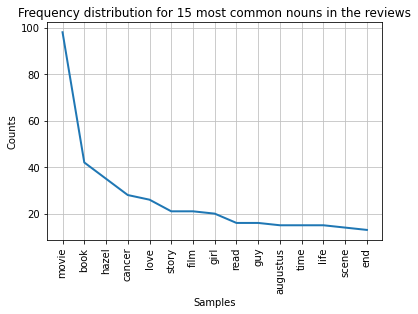

In [92]:
def most_common_nouns(word_list):
    """
    This function displays the frequency distribution for 30 most common
    nouns found in the movie reviews.
    """
    nouns = [] #list containing all the nouns in the reviews
    nouns = [word for (word, pos) in word_list if (pos == 'NN' or pos == 'NNS')] 

    from nltk.probability import FreqDist
    fdist = FreqDist(nouns) #counts the frequency of each noun
    fdist.plot(15,title='Frequency distribution for 15 most common nouns in the reviews') #displays the plot

most_common_nouns(pos_tag_words_list)

### 15 most common adjectives in the IMDB  reviews for The Fault in Our Stars 

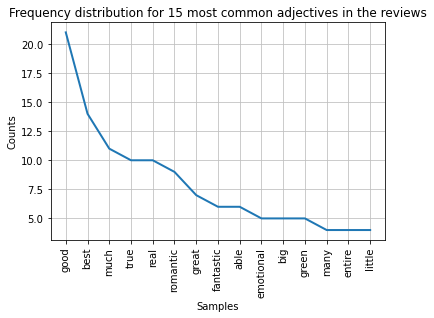

In [93]:
def most_common_adjectives(word_list):
    """
    This function displays the frequency distribution for 30 most common
    adjectives found in the movie reviews.
    """
    adjectives = [] #list containing all the adjectives in the reviews
    adjectives = [word for (word, pos) in word_list if (pos == 'JJ' or pos == 'JJR' or pos == 'JJS')] 

    from nltk.probability import FreqDist
    fdist = FreqDist(adjectives) #counts the frequency of each adjective
    fdist.plot(15,title='Frequency distribution for 15 most common adjectives in the reviews') #displays the plot

most_common_adjectives(pos_tag_words_list)

### Sentiment analysis for the IMDB review of The Fault in Our Stars

In [87]:
def df_sentiment_analysis(sentences):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    
    import pandas as pd
    df = pd.DataFrame({'reviews': all_sentences}) #create a dataframe 
    df = df.assign(title=get_movie_title(movie_id))
    
    #get sentiment scores for each sentence in the movie reviews 
    df['pos'] = df['reviews'].apply(lambda x:analyzer.polarity_scores(x)['pos']) #positive sentiment score for the sentence
    df['neu'] = df['reviews'].apply(lambda x:analyzer.polarity_scores(x)['neu']) #neutral sentiment score for the sentence
    df['neg'] = df['reviews'].apply(lambda x:analyzer.polarity_scores(x)['neg']) #negative sentiment score for the sentence
    df['compound'] = df['reviews'].apply(lambda x:analyzer.polarity_scores(x)['compound']) #compound sentiment score for the sentence
    return df

df_sentiment_analysis(tokenized_sents)
sentiment_analysis = df_sentiment_analysis(tokenized_sents)

,reviews,title,pos,neu,neg,compound
0,One of the best romance movies I have ever see...,The Fault in Our Stars,0.403,0.597,0.0,0.8957
1,I loved the book and I loved the movie even more.,The Fault in Our Stars,0.527,0.473,0.0,0.8316
2,"The writing, plot, story, and screenplay were ...",The Fault in Our Stars,0.340,0.660,0.0,0.5574
3,Shaileen Woodley and Ansel Elgort's performanc...,The Fault in Our Stars,0.000,1.000,0.0,0.0000
4,"The Fault in Our Stars is gorgeous, funny and ...",The Fault in Our Stars,0.375,0.425,0.2,0.7906
...,...,...,...,...,...,...
382,The only moment that was a bit moving was when...,The Fault in Our Stars,0.000,1.000,0.0,0.0000
383,But even that wasn't connected emotionally to ...,The Fault in Our Stars,0.000,1.000,0.0,0.0000
384,I can list a hundred movies that are WAY more ...,The Fault in Our Stars,0.063,0.937,0.0,0.2247
385,I know cigarettes eventually PUT you in the co...,The Fault in Our Stars,0.000,1.000,0.0,0.0000


In [86]:
def descriptive_stat(df):
    return df.describe() #get the descriptive statistics for all the sentiment scores

descriptive_stat(sentiment_analysis)

,pos,neu,neg,compound
count,387.000000,387.000000,387.000000,387.000000
mean,0.149530,0.766134,0.084331,0.114688
std,0.171789,0.183618,0.119111,0.479368
min,0.000000,0.000000,0.000000,-0.946000
25%,0.000000,0.650000,0.000000,-0.160400
50%,0.118000,0.769000,0.000000,0.000000
75%,0.241500,0.914500,0.150000,0.541700
max,1.000000,1.000000,0.530000,0.960000
